---
title: DBScan Clustering algorithm
author: Mohammed Jamal

---

# DBSCAN Clustering algorithm with python

## What is DBSCAN Clustering?

Density-based spatial clustering of applications with noise (DBSCAN)

### Important dbscan model parameter

- Eps: max distance between two samples for them to be clustered in the same neighborhood (start at eps=0.1)

- min_samples : min number of samples in an neighborhood for a data point to qualify as a core point (start with very low sample size)

## DBSCAN Clustering to identify Outliers

In [4]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from pylab import rcParams

from sklearn.cluster import DBSCAN
from collections import Counter

rcParams['figure.figsize'] = (5, 4)
sb.set_style('whitegrid')


### Train your model and identify outliers

In [6]:
df = pd.read_csv('iris.data.csv', header=None, sep=',')
df.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
data   = df.iloc[:, 0:4]
target = df.iloc[:, 4]

print(df[:5])



   Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [7]:
# initiate dbscan object
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


### Visualize your results

In [10]:
outliers_df = pd.DataFrame(data)
print (Counter(model.labels_))
print (outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
     Sepal Length  Sepal Width  Petal Length  Petal Width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


### display data in figure

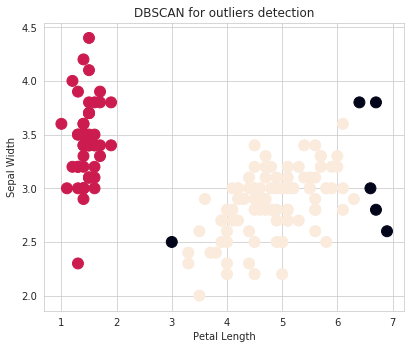

In [15]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(data.iloc[:, 2].values, data.iloc[:, 1].values, c=colors, s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outliers detection')
plt.show()